In [1]:
selected_feature = 'sq_ft'
selected_feature = 'property_age'
#selected_feature = 'bedrooms'

In [2]:
# Python program to generate WordCloud

# importing all necessary modules
import json

from matplotlib.pyplot import title
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

#df_original = vv.get_combined_dataset(HOW="left", early_duplicates=True, row_limit=500)
df_original = vv.get_combined_dataset(HOW="left", early_duplicates=True)
df_original = vv.prettify_dataset(df_original)
df_original = vv.dataset_numerify_columns(df_original,['Price',selected_feature])

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:439: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


remove duplicates: 24143/49617/44393/44954/16764 ==> 24143/40079/39870/39886/16764


In [3]:
df = df_original.loc[:,['Price','borough_name','analyticsProperty.propertyType', selected_feature]]
df.tail(10)

,Price,borough_name,analyticsProperty.propertyType,property_age
ids,,,,
120321923,440000.0,Hillingdon,Houses,37.0
120501506,440000.0,Hillingdon,Houses,37.0
123906503,440000.0,Hillingdon,Flats / Apartments,37.0
119011196,440000.0,Hillingdon,Houses,37.0
120100592,440000.0,Hillingdon,Flats / Apartments,37.0
121041542,440000.0,Hillingdon,Houses,37.0
113743676,440000.0,Hillingdon,Houses,37.0
120696125,440000.0,Hillingdon,Houses,37.0
123577607,440000.0,Hillingdon,Flats / Apartments,37.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24139 entries, 85780593 to 114438299
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           24103 non-null  float64
 1   borough_name                    24139 non-null  object 
 2   analyticsProperty.propertyType  24139 non-null  object 
 3   property_age                    16764 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='property_age', ylabel='Price'>

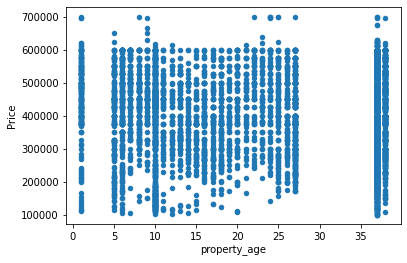

In [5]:
df.plot(kind="scatter", x=selected_feature, y="Price")

In [6]:
borough_names_df = df_original[['borough_name']].value_counts()
borough_names_df

borough_name          
Newham                    1886
Croydon                   1735
Tower Hamlets             1698
Southwark                 1582
Lambeth                   1518
Wandsworth                1512
Ealing                    1270
Waltham Forest            1244
Redbridge                 1218
Lewisham                  1218
Kingston upon Thames      1071
Richmond upon Thames      1064
Hounslow                  1060
Sutton                    1035
Merton                    1002
Hillingdon                 773
Westminster                684
Greenwich                  587
Havering                   539
Kensington and Chelsea     483
Enfield                    432
Bexley                     196
Barnet                     124
Barking and Dagenham        94
Islington                   84
City of London              30
dtype: int64

In [7]:
borough_names = list(df.borough_name.unique())
propertyType_names = list(df['analyticsProperty.propertyType'].unique())
propertyType_names = ['Houses', 'Flats / Apartments']
i = -1
#propertyType_names

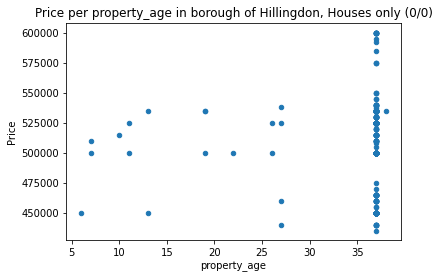

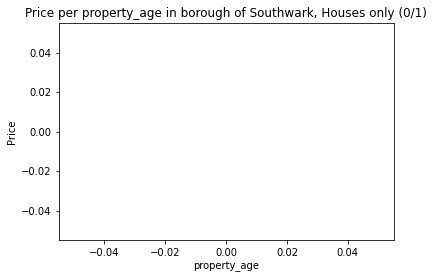

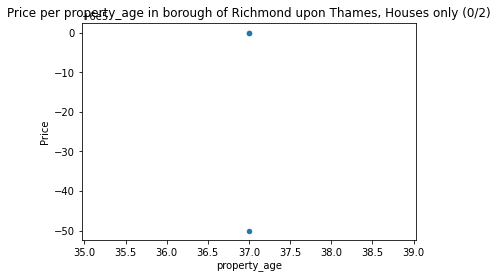

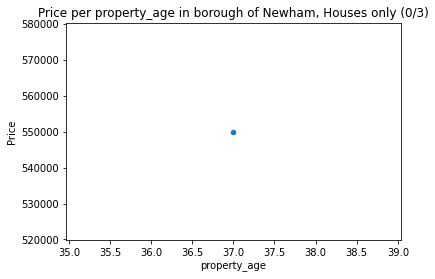

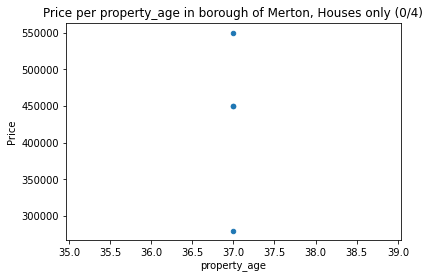

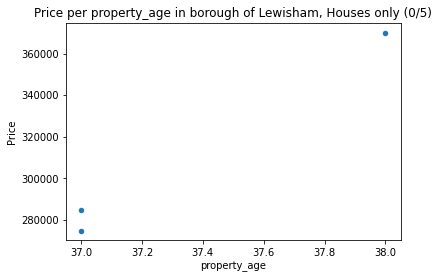

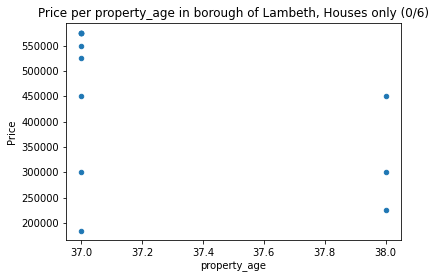

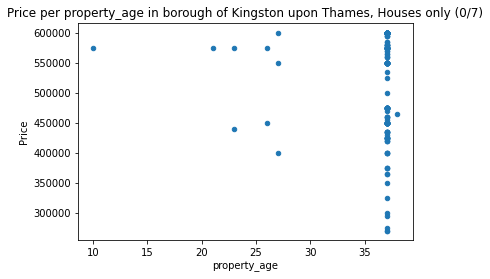

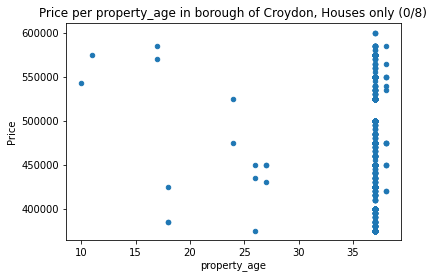

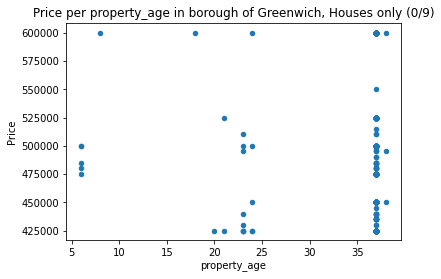

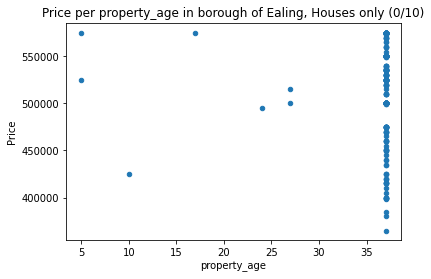

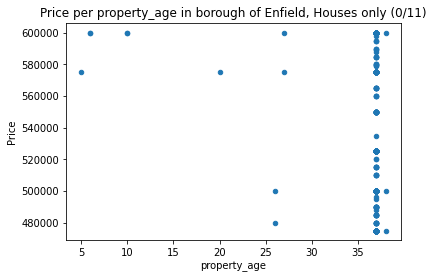

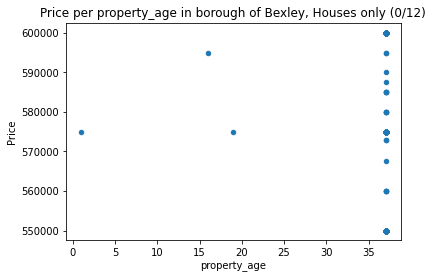

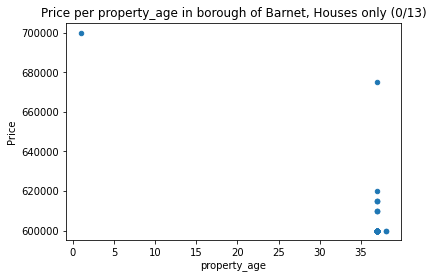

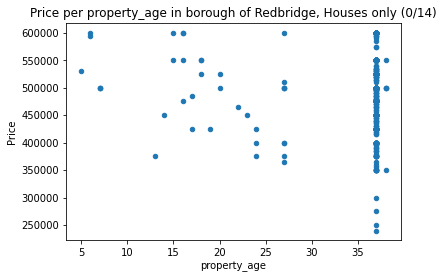

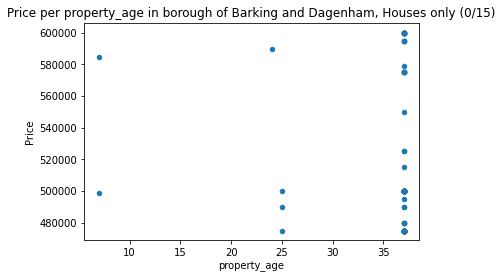

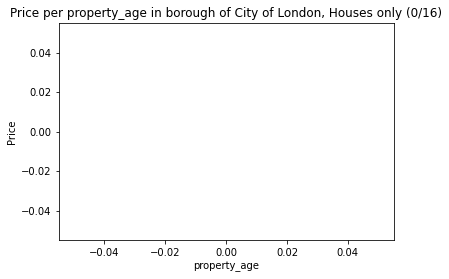

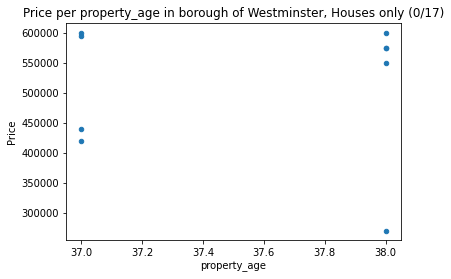

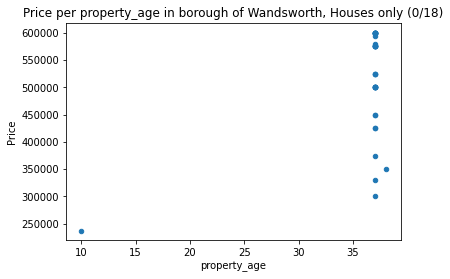

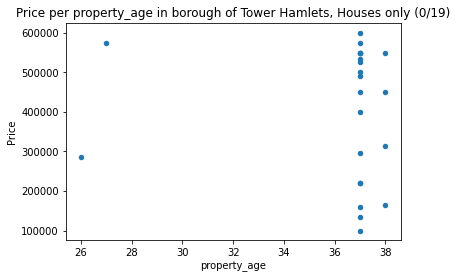

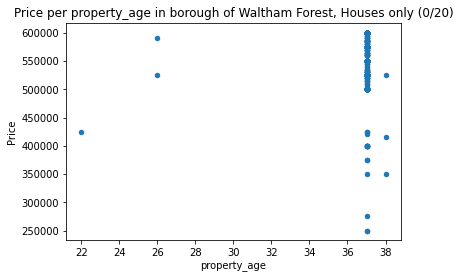

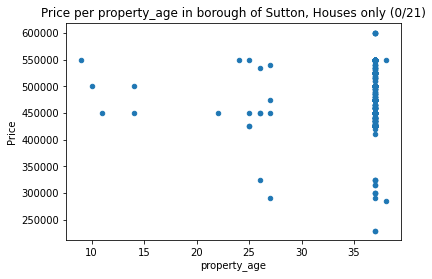

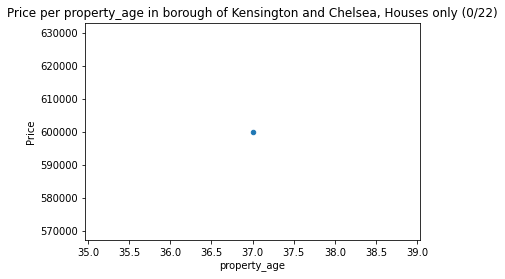

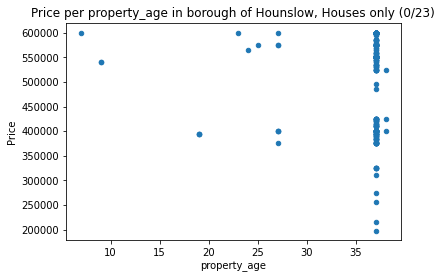

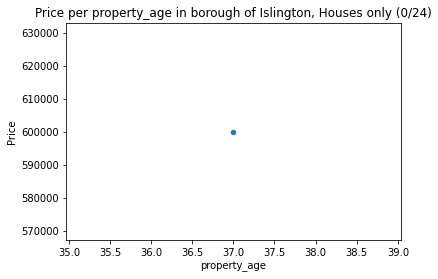

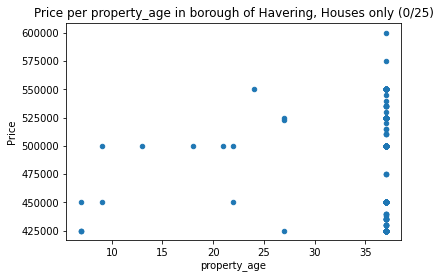

In [8]:
i = (i + 1 ) % len(propertyType_names)
for h in range(len(borough_names)):
    df_by_borough = df.loc[(df['borough_name'] == borough_names[h]) & (df['analyticsProperty.propertyType'] == propertyType_names[i]),:]
    df_by_borough
    df_by_borough.plot(kind="scatter", x=selected_feature, y="Price",title=f"Price per {selected_feature} in borough of {borough_names[h]}, {propertyType_names[i]} only ({i}/{h})")
    plt.show()

In [9]:
df['borough_name'].value_counts()

Newham                    1886
Croydon                   1735
Tower Hamlets             1698
Southwark                 1582
Lambeth                   1518
Wandsworth                1512
Ealing                    1270
Waltham Forest            1244
Lewisham                  1218
Redbridge                 1218
Kingston upon Thames      1071
Richmond upon Thames      1064
Hounslow                  1060
Sutton                    1035
Merton                    1002
Hillingdon                 773
Westminster                684
Greenwich                  587
Havering                   539
Kensington and Chelsea     483
Enfield                    432
Bexley                     196
Barnet                     124
Barking and Dagenham        94
Islington                   84
City of London              30
Name: borough_name, dtype: int64